# Multiprocessing

In [1]:
def square(x):
    return x**2

In [2]:
data=[i for i in range(1000000)]

In [3]:
%%time
seq=[square(x) for x in data]
seq[:10]

CPU times: user 367 ms, sys: 25.1 ms, total: 392 ms
Wall time: 461 ms


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [4]:
import multiprocessing as mp
import numpy as np

In [5]:
mp.cpu_count()

4

In [6]:
%%time
pool=mp.Pool(mp.cpu_count())   # grupo con todos los nucleos

res=pool.map(square, data)
pool.close()
res[:10]

CPU times: user 117 ms, sys: 53.3 ms, total: 170 ms
Wall time: 284 ms


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [7]:
res=[]
for e in data:
    res.append(e**2)
res[:10]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [8]:
list(map(square, data))[:10]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [9]:
array=np.random.randint(0, 10, size=[200, 5000])
data=array.tolist()

In [10]:
def rango(r, mini, maxi):
    c=0
    for e in r:
        if mini<=e<=maxi:
            c=+1
    return c

In [11]:
%time res=[rango(e, 4, 8) for e in data]
res[:10]

CPU times: user 73.2 ms, sys: 5.91 ms, total: 79.1 ms
Wall time: 83.1 ms


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
pool=mp.Pool()

%time res=pool.starmap(rango, [rango(e, 4, 8) for e in data])
pool.close()

TypeError: 'int' object is not iterable

In [13]:
def rango2(i, r, mini, maxi):
    c=0
    
    for e in r:
        if mini<=e<=maxi:
            c=+1
            
    return i, c

In [14]:
res=[]

def colecta(resul):
    global res
    res.append(resul)

In [15]:
pool=mp.Pool(3)

for i,e in enumerate(data):
    pool.apply_async(rango2, args=(i,e,4,8), callback=colecta)
    
pool.close()
pool.join()

res.sort(key=lambda x: x[0])

res[:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [16]:
import pandas as pd

In [17]:
df=pd.DataFrame(np.random.randint(3, 10, size=[5, 2]))
df

,0,1
0,5,3
1,8,4
2,8,9
3,9,6
4,7,8


In [18]:
def hipo(c):
    return (c[1]**2+c[2]**2)**0.5

In [19]:
with mp.Pool(3) as pool:
    res=pool.imap(hipo, df.itertuples(name=None), chunksize=10)
    out=[round(e, 2) for e in res]
out

[5.83, 8.94, 12.04, 10.82, 10.63]

# Pathos

In [20]:
from pathos.multiprocessing import ProcessingPool as Pool

In [24]:
df

,0,1
0,5,3
1,8,4
2,8,9
3,9,6
4,7,8


In [25]:
def fun(df):
    return df.shape

In [26]:
cores=mp.cpu_count()

df_split=np.array_split(df, cores, axis=0)

pool=Pool(cores)

df_out=pd.DataFrame(np.vstack(pool.map(fun, df_split)))

pool.close()
pool.join()
pool.clear()

In [27]:
df_out

,0,1
0,2,2
1,1,2
2,1,2
3,1,2


# Dask

In [21]:
# !pip3 install "dask[complete]"
# !pip3 install dask_ml

In [28]:
import os
import dask
import dask.dataframe as dd

In [29]:
archivos=os.path.join('../data', 'accounts.*.csv')
print(archivos)

../data/accounts.*.csv


In [31]:
df=dd.read_csv(archivos)
df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [32]:
df=dd.read_csv(os.path.join('../data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]})
df.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [33]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [34]:
df=dd.read_csv(os.path.join('../data', 'nycflights', '*.csv'),
               parse_dates={'Date':[0,1,2]},
               dtype={'TailNum': str, 'CRSElapsedTime':float, 'Cancelled':bool})


df.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [35]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 21 entries, Date to Diverted
dtypes: datetime64[ns](1), object(4), bool(1), float64(10), int64(5)
memory usage: 401.0 MB


In [38]:
df.shape

(Delayed('int-f14bcb84-8430-4a8c-b3db-f1a57c29155f'), 21)

In [40]:
df.DepDelay.max().compute()

1435.0

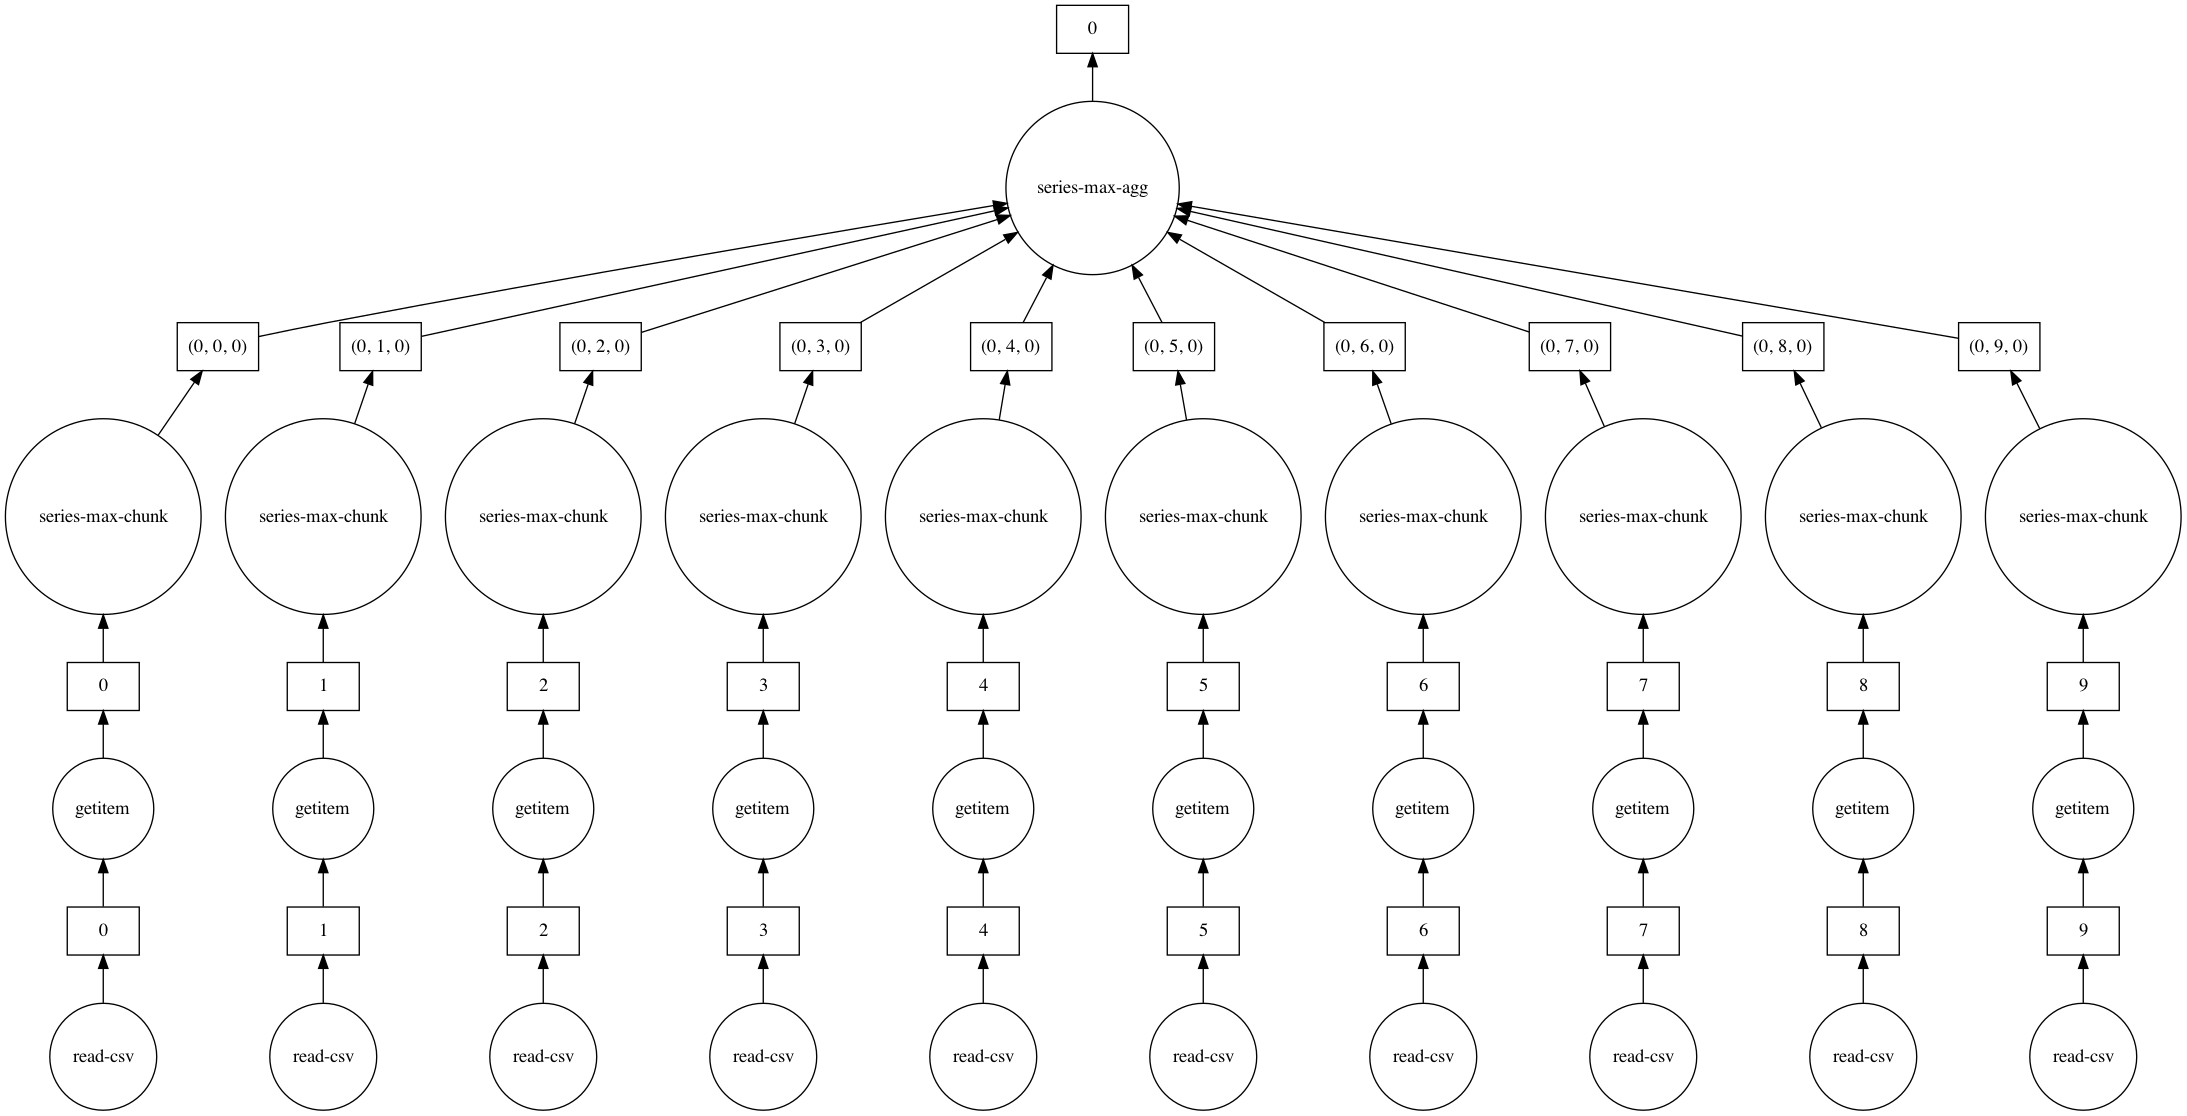

In [41]:
df.DepDelay.max().visualize(filename='../images/max_dask.png')

In [42]:
len(df)

2611892

In [45]:
len(df[~df.Cancelled])    # virgulilla ==> lo contrario (como el no logico)

2540961

In [47]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [48]:
no_cancelado=df[~df.Cancelled]

media_delay=no_cancelado.DepDelay.mean()
std_delay=no_cancelado.DepDelay.std()

In [49]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [50]:
%time media_delay.compute()

CPU times: user 6.63 s, sys: 1.27 s, total: 7.9 s
Wall time: 5.15 s


9.206602541321965

In [51]:
%time std_delay.compute()

CPU times: user 6.7 s, sys: 1.27 s, total: 7.97 s
Wall time: 5.06 s


28.974539774551456

In [52]:
%time media_delay_res, std_delay_res = dask.compute(media_delay, std_delay)

CPU times: user 6.77 s, sys: 1.29 s, total: 8.06 s
Wall time: 5.34 s


In [53]:
media_delay_res

9.206602541321965

In [54]:
std_delay_res

28.974539774551456

In [55]:
type(std_delay_res)

numpy.float64

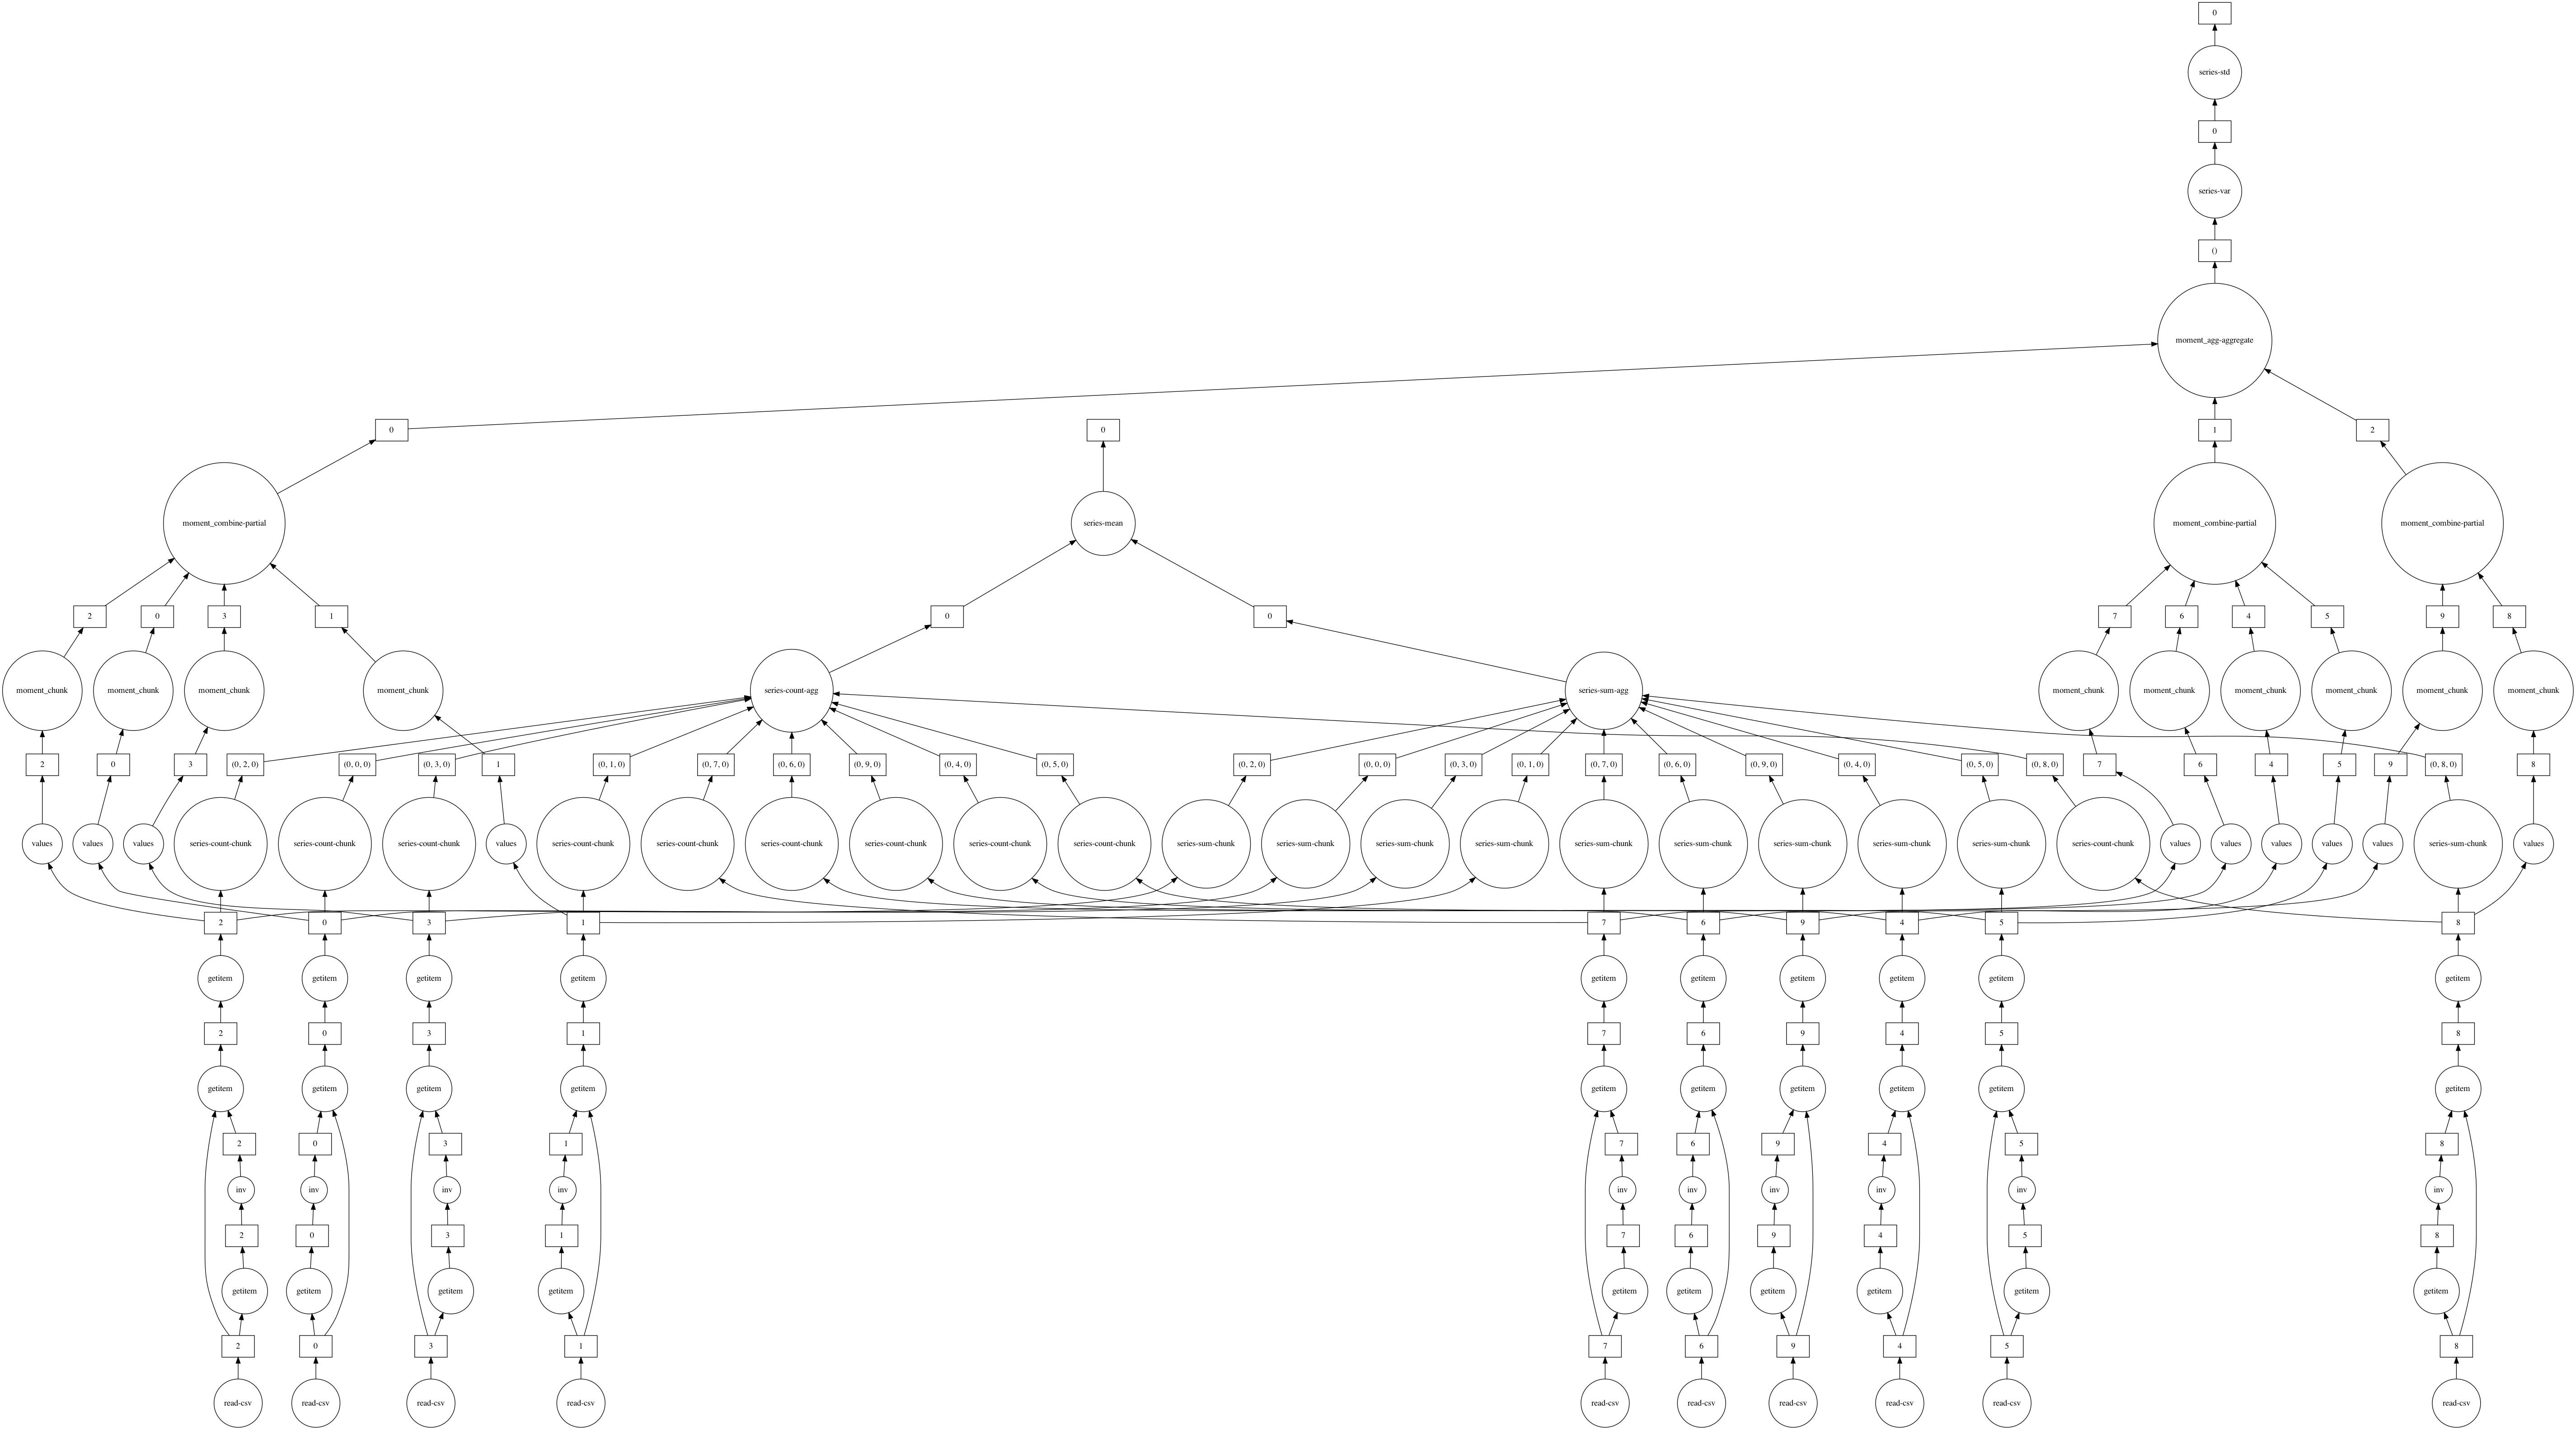

In [56]:
dask.visualize(media_delay, std_delay, filename='../images/std_dask.png')

# HDFS y Parquet  (sistemas de archivos)

In [22]:
# parquet
# !pip3 install fastparquet

# tqdm

In [23]:
# !pip3 install tqdm